# Movie correlation project



In [1]:
# Import libraries

import pandas as pd
import seaborn as sns
import numpy as np
import re

import matplotlib.pyplot as plt
import matplotlib
from matplotlib.pyplot import figure

plt.style.use('ggplot')

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

# Read in data

df = pd.read_csv('movies.csv')

In [3]:
# Look at the data

df.head(1000)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,My Chauffeur,R,Comedy,1986,"January 24, 1986 (United States)",5.6,1900.0,David Beaird,David Beaird,Deborah Foreman,United States,NaN,4781448.0,Marimark Productions,97.0
996,Biggles: Adventures in Time,PG,Adventure,1986,"January 29, 1988 (United States)",5.7,2800.0,John Hough,W.E. Johns,Neil Dickson,United Kingdom,NaN,NaN,Compact Yellowbill,108.0
997,Half Moon Street,R,Drama,1986,"September 26, 1986 (United States)",5.4,2500.0,Bob Swaim,Edward Behr,Sigourney Weaver,United Kingdom,NaN,1131399.0,Centurion,90.0
998,Every Time We Say Goodbye,PG-13,Drama,1986,"November 14, 1986 (United States)",5.9,2300.0,Moshé Mizrahi,Moshé Mizrahi,Tom Hanks,Israel,NaN,278623.0,Delphi V Productions,98.0


In [7]:
# Checking null values

# We can get the percentage of null values in each column
for col in df.columns:
    pct_missing = np.mean(df[col].isna())
    print('{} - {}%'.format(col,pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [9]:
# We can sum the total values which are null
df.isna().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [13]:
# Here will be grouping our data and then transform that data keep the same index and applying the median by group
df['budget'] = df.groupby('genre')['budget'].transform(lambda x: x.fillna(x.median()))

# We can sum the total values which are null
df.isna().sum()

name          0
rating       77
genre         0
year          0
released      2
score         3
votes         3
director      0
writer        3
star          1
country       3
budget        4
gross       189
company      17
runtime       4
dtype: int64

In [17]:
# We can see we still have null values in gross meaning there was not a median for 4 different genre categories, meaning there is only one category 
# value per category or all values in the category are null
# Now we will replace those values with the median of the entire budget column as they do not have a genre median

df['budget'] = df['budget'].fillna(df['budget'].median())

In [19]:
# Replacing null values for gross column with the median gross value per genre

df['gross'] = df.groupby('genre')['gross'].transform(lambda x: x.fillna(x.median()))

In [21]:
# We can see we still have null values in gross meaning there was not a median for 4 different genre categories, meaning there is only one 
# value per category or all values in the category are null
# Now we will replace those values with the median of the entire budget column as they do not have a genre median

df['gross'] = df['gross'].fillna(df['gross'].median())

In [23]:
# There are more columns with null values however these amount of null values are very small so based on the scope of this project 
# will not affect our results. We will replace with unknown or 0

df['country'] = df['country'].fillna('Unknown')

df['star'] = df['star'].fillna('Unknown')

df['writer'] = df['writer'].fillna('Unknown')

df['company'] = df['company'].fillna('Unknown')

df['runtime'] = df['runtime'].fillna(0)

df['votes'] = df['runtime'].fillna(0)

df['score'] = df['score'].fillna(0)

df['released'] = df['released'].fillna('Unknown')

In [25]:
# We can sum the total values which are null
df.isna().sum()

name         0
rating      77
genre        0
year         0
released     0
score        0
votes        0
director     0
writer       0
star         0
country      0
budget       0
gross        0
company      0
runtime      0
dtype: int64

In [27]:
# Writer is still a column with a big amount of null values
# We will use the mode to fill those NaN values based on the writer

# When checking the rating for each writer we can see how each normally has the same rating for each movie wrote by them
# This suggests normally each writer will likely have the same type of rating for their movies
df[df['writer'] == 'Stephen King']

# Now we will group the data and then get the mode in the rating column which will be applied to the null values in the rating column
df['rating'] = df.groupby('writer')['rating'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'unknow'))

In [29]:
# Converting columns gross and budget to int64

df['gross'] = df['gross'].astype('int64')
df['budget'] = df['budget'].astype('int64')

In [33]:
# We also found that in the year column has a different date than the release date and both hipotecally should be matching
# We will create a new column with the correct year. We will keeo the year column until further notice to avoid deleting data

# Let's create the new column
# Let's use regex to obtain of from the 'released' column country. 
# We filled the NaN values with unknown for the released column, meaning if we try to extract it will return NaN
# We will use a lambda function if it's unknows then our country will unknown as well

def convert_to_country(released): # Creating a function to extract the country from our 'released' column
    if released != 'Unknown': # Using a condition due there are 'Unknown' values which were NaN before
        return re.search(r'\((.*?)\)',released).group(1) # Here we use regex to extract the country 
                                                         # Then we obtained what's inside the match
    else:
        return 'Unknown' # In case there is an 'Unknown' value we would also return 'Unknown'


# Using a lambda function to go through each value and extract the country we our function above
df['country'] = df['released'].apply(lambda x: convert_to_country(x)) 

In [35]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,146.0,Stanley Kubrick,Stephen King,Jack Nicholson,United States,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,104.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,124.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,88.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,98.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [41]:
# We can sum the total values which are null
df.isna().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [43]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,146.0,Stanley Kubrick,Stephen King,Jack Nicholson,United States,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,104.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,124.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,88.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,98.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [45]:
# Now we will keep the 'released' column to avoid deleting data, however we will create a new column only with the released date as datetime datatype if needed
from datetime import datetime


def released_date_convertion(released_date):

    possibleDateFormats = ['%B %Y','%B %d, %Y', '%Y'] # Creating a list of possible date formats
    
    converted_date = "" # Creating a variable that will store our converted string
    
    for formats in possibleDateFormats: # Using a loop to iteracte through the different formats we might find when converting it.
         try:
             extracted_date = re.sub(r'\s*\(.*?\).*?',"",released_date) # Using regex to extract only the year,month and day
             converted_date = datetime.strptime(extracted_date,formats).date() # using the datetime library to convert the string to date format
             break # if correct format, don't test any other formats
         except ValueError:
            pass # if incorrect format, keep trying other formats
    return converted_date # After converting the string convert it and return it




df['released_date'] = df['released'].apply(lambda x: released_date_convertion(x)) # Using a lambda function to convert each field by using the function

In [47]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_date
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,146.0,Stanley Kubrick,Stephen King,Jack Nicholson,United States,19000000,46998772,Warner Bros.,146.0,1980-06-13
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,104.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980-07-02
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,124.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980-06-20
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,88.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980-07-02
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,98.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980-07-25


In [49]:
# Now let's sort the dataframe by the 'gross' column

# Let's change the default view for rows when it's over 20 rows
pd.set_option('display.max_rows',None)

# Now let's print more rows. Just changing this if needed during the project
df.sort_values(by=['gross'],inplace=True,ascending=False)

In [51]:
df.head(50)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_date
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,162.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009-12-18
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,181.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019-04-26
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,194.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997-12-19
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,138.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015-12-18
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,149.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018-04-27
7480,The Lion King,PG,Animation,2019,"July 19, 2019 (United States)",6.9,118.0,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000,1670727580,Walt Disney Pictures,118.0,2019-07-19
6653,Jurassic World,PG-13,Action,2015,"June 12, 2015 (United States)",7.0,124.0,Colin Trevorrow,Rick Jaffa,Chris Pratt,United States,150000000,1670516444,Universal Pictures,124.0,2015-06-12
6043,The Avengers,PG-13,Action,2012,"May 4, 2012 (United States)",8.0,143.0,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,220000000,1518815515,Marvel Studios,143.0,2012-05-04
6646,Furious 7,PG-13,Action,2015,"April 3, 2015 (United States)",7.1,137.0,James Wan,Chris Morgan,Vin Diesel,United States,190000000,1515341399,Universal Pictures,137.0,2015-04-03
7494,Frozen II,PG,Animation,2019,"November 22, 2019 (United States)",6.8,103.0,Chris Buck,Jennifer Lee,Kristen Bell,United States,150000000,1450026933,Walt Disney Animation Studios,103.0,2019-11-22


In [73]:
# It's great to see the best top 2 movies with major gross was Avatar and Avengers: Endgame

In [53]:
# Checking duplicates

df.duplicated().sum()

0

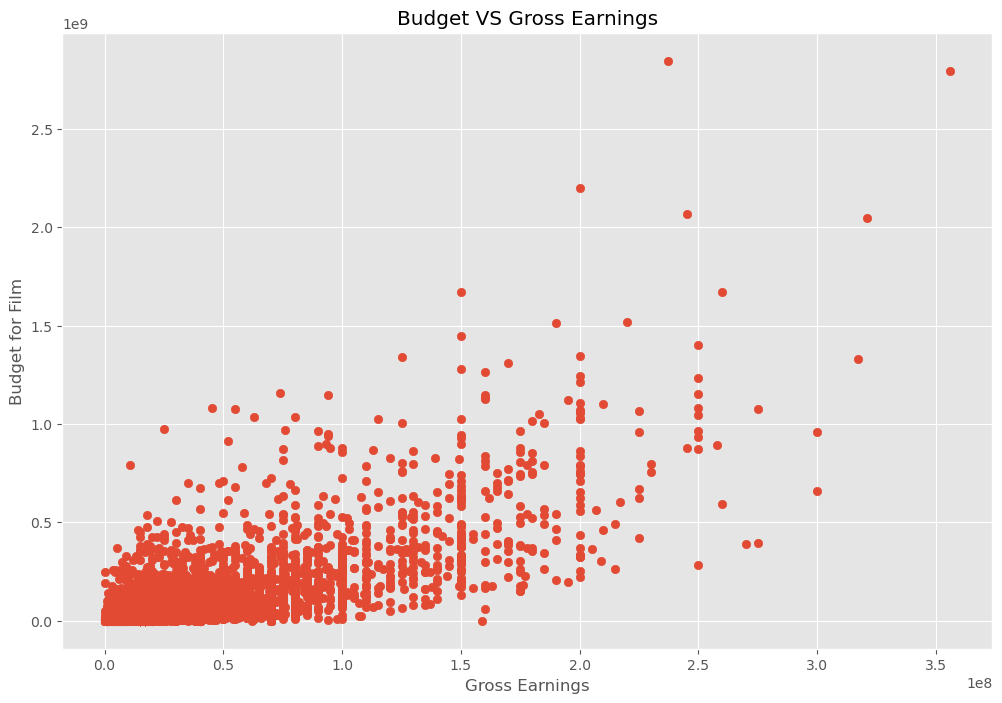

In [55]:
# Testing out correlation

plt.scatter(x=df["budget"],y=df["gross"])
plt.title("Budget VS Gross Earnings")
plt.xlabel("Gross Earnings")
plt.ylabel("Budget for Film")
plt.show()


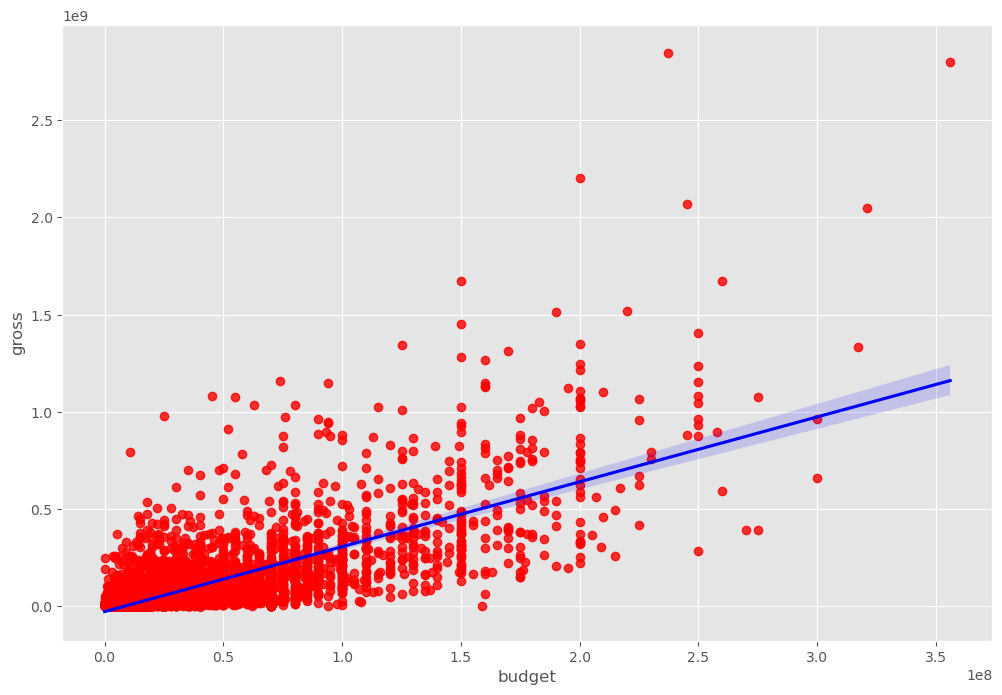

In [328]:
# Plot Budget VS Gross using seaborn

sns.regplot(data=df,x="budget",y="gross",scatter_kws={"color": "red"},line_kws={"color":"blue"})
plt.show()

In [57]:
numeric_data = df.select_dtypes(include='number')
correlation_matrix = numeric_data.corr()
correlation_matrix

,year,score,votes,budget,gross,runtime
year,1.000000,0.092616,0.116358,0.292222,0.258588,0.116358
score,0.092616,1.000000,0.394564,0.062299,0.184357,0.394564
votes,0.116358,0.394564,1.000000,0.262049,0.242950,1.000000
budget,0.292222,0.062299,0.262049,1.000000,0.738093,0.262049
gross,0.258588,0.184357,0.242950,0.738093,1.000000,0.242950
runtime,0.116358,0.394564,1.000000,0.262049,0.242950,1.000000


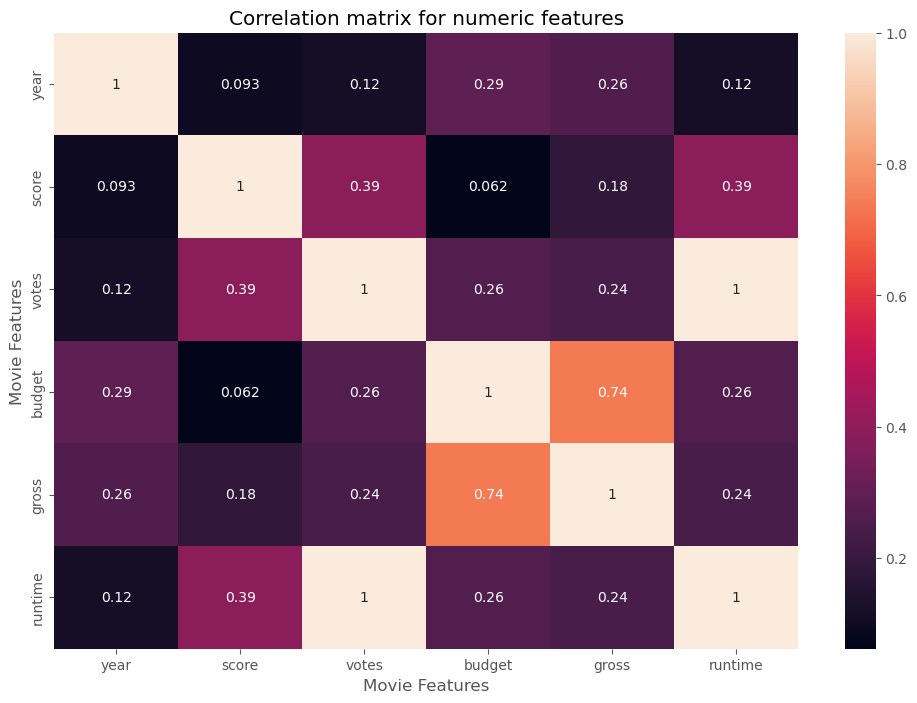

In [332]:
sns.heatmap(correlation_matrix,annot=True)

plt.title("Correlation matrix for numeric features")
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")

plt.show()

In [334]:
# Looks at company

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,162.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,181.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,194.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,138.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,149.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0


In [65]:
df_numerized = df.copy(deep=True)

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_date
5445,533,5,0,2009,696,7.8,162.0,1155,1778,2334,56,237000000,2847246203,2253,162.0,2103
7445,535,5,0,2019,183,8.4,181.0,162,743,2241,56,356000000,2797501328,1606,181.0,2862
3045,6896,5,6,1997,704,7.8,194.0,1155,1778,1595,56,200000000,2201647264,2253,194.0,1220
6663,5144,5,0,2015,698,7.8,138.0,1125,2550,524,56,245000000,2069521700,1540,138.0,2606
7244,536,5,0,2018,192,8.4,149.0,162,743,2241,56,321000000,2048359754,1606,149.0,2777


In [61]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_date
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,162.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009-12-18
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,181.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019-04-26
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,194.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997-12-19
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,138.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015-12-18
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,149.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018-04-27


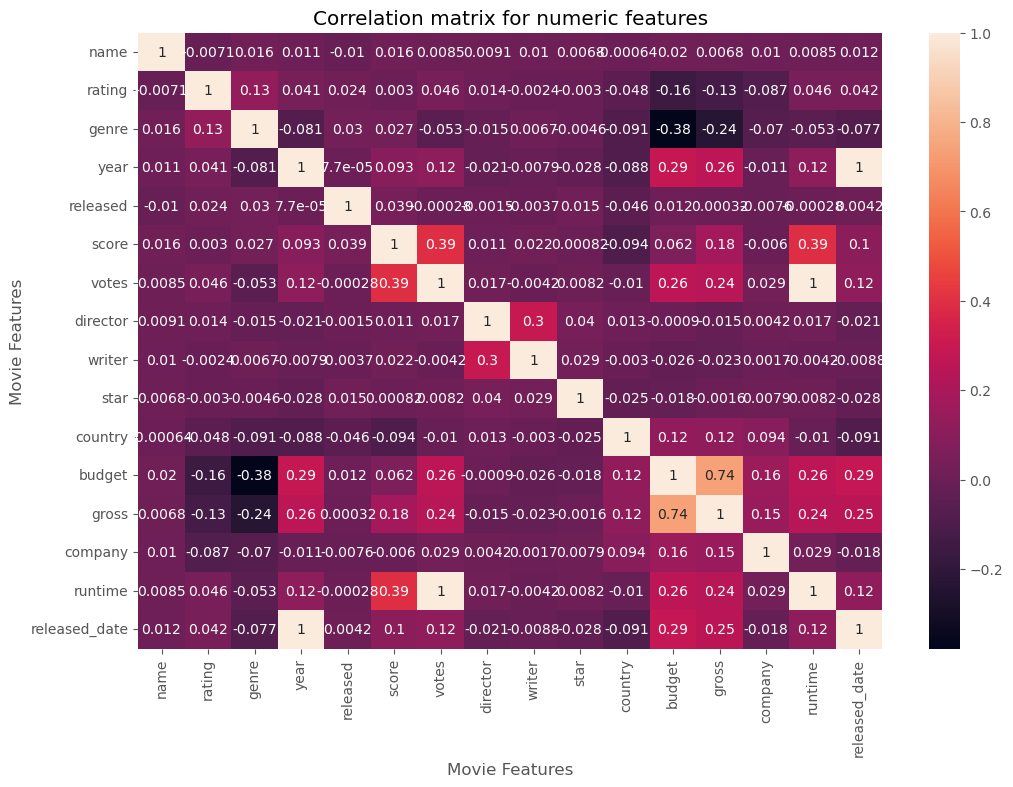

In [69]:
correlation_matrix = df_numerized.corr()

sns.heatmap(correlation_matrix,annot=True)

plt.title("Correlation matrix for numeric features")
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")

plt.show()

In [71]:
df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_date
name,1.000000,-0.007075,0.016355,0.011453,-0.010480,0.016377,0.008483,0.009079,0.009985,0.006844,-0.000641,0.019553,0.006781,0.010373,0.008483,0.011685
rating,-0.007075,1.000000,0.131980,0.040940,0.024397,0.003017,0.046156,0.014423,-0.002443,-0.003011,-0.048055,-0.159464,-0.128711,-0.086506,0.046156,0.041584
genre,0.016355,0.131980,1.000000,-0.081261,0.030429,0.027384,-0.052914,-0.015258,0.006747,-0.004641,-0.090823,-0.378628,-0.235357,-0.070032,-0.052914,-0.077156
year,0.011453,0.040940,-0.081261,1.000000,0.000077,0.092616,0.116358,-0.020795,-0.007930,-0.027912,-0.088478,0.292222,0.258588,-0.011425,0.116358,0.997016
released,-0.010480,0.024397,0.030429,0.000077,1.000000,0.039182,-0.000281,-0.001526,-0.003707,0.015474,-0.046335,0.012094,0.000319,-0.007634,-0.000281,0.004219
score,0.016377,0.003017,0.027384,0.092616,0.039182,1.000000,0.394564,0.010568,0.022475,0.000823,-0.094076,0.062299,0.184357,-0.005964,0.394564,0.101479
votes,0.008483,0.046156,-0.052914,0.116358,-0.000281,0.394564,1.000000,0.017062,-0.004213,0.008216,-0.010177,0.262049,0.242950,0.029442,1.000000,0.117428
director,0.009079,0.014423,-0.015258,-0.020795,-0.001526,0.010568,0.017062,1.000000,0.299523,0.039875,0.013318,-0.000904,-0.014575,0.004248,0.017062,-0.021319
writer,0.009985,-0.002443,0.006747,-0.007930,-0.003707,0.022475,-0.004213,0.299523,1.000000,0.028887,-0.002989,-0.026046,-0.022648,0.001729,-0.004213,-0.008838
star,0.006844,-0.003011,-0.004641,-0.027912,0.015474,0.000823,0.008216,0.039875,0.028887,1.000000,-0.025366,-0.018104,-0.001553,0.007918,0.008216,-0.027976


In [73]:
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

name           name             1.000000
               rating          -0.007075
               genre            0.016355
               year             0.011453
               released        -0.010480
               score            0.016377
               votes            0.008483
               director         0.009079
               writer           0.009985
               star             0.006844
               country         -0.000641
               budget           0.019553
               gross            0.006781
               company          0.010373
               runtime          0.008483
               released_date    0.011685
rating         name            -0.007075
               rating           1.000000
               genre            0.131980
               year             0.040940
               released         0.024397
               score            0.003017
               votes            0.046156
               director         0.014423
               w

In [77]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

genre          budget          -0.378628
budget         genre           -0.378628
genre          gross           -0.235357
gross          genre           -0.235357
budget         rating          -0.159464
rating         budget          -0.159464
gross          rating          -0.128711
rating         gross           -0.128711
score          country         -0.094076
country        score           -0.094076
               released_date   -0.091171
released_date  country         -0.091171
country        genre           -0.090823
genre          country         -0.090823
country        year            -0.088478
year           country         -0.088478
company        rating          -0.086506
rating         company         -0.086506
genre          year            -0.081261
year           genre           -0.081261
released_date  genre           -0.077156
genre          released_date   -0.077156
               company         -0.070032
company        genre           -0.070032
votes          g

In [91]:
high_corr = sorted_pairs[sorted_pairs > 0.5]

high_corr

budget         gross            0.738093
gross          budget           0.738093
year           released_date    0.997016
released_date  year             0.997016
name           name             1.000000
runtime        votes            1.000000
rating         rating           1.000000
genre          genre            1.000000
year           year             1.000000
released       released         1.000000
score          score            1.000000
votes          votes            1.000000
runtime        runtime          1.000000
votes          runtime          1.000000
writer         writer           1.000000
star           star             1.000000
country        country          1.000000
budget         budget           1.000000
gross          gross            1.000000
company        company          1.000000
director       director         1.000000
released_date  released_date    1.000000
dtype: float64

In [ ]:
# Budget and gross had the highest correlation